# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

Which variables would we need to **dummify**?

In [ ]:
!pip install seaborn
import seaborn as sns
penguins = sns.load_dataset("penguins")
print(penguins.head())
import pandas as pd

penguins_dummies = pd.get_dummies(penguins, columns=['species', 'island'], drop_first=True)



  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female  


Let's use `bill_length_mm` to predict `bill_depth_mm`. Prepare your data and fit the following models on the entire dataset:

* Simple linear regression (e.g. straight-line) model
* Quadratic (degree 2 polynomial) model
* Cubic (degree 3 polynomial) model
* Degree 10 polynomial model

Make predictions for each model and plot your fitted models on the scatterplot.

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


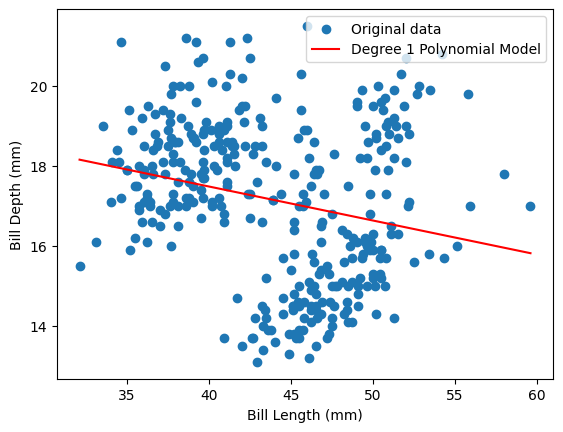

Root Mean Squared Error: 1.91


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


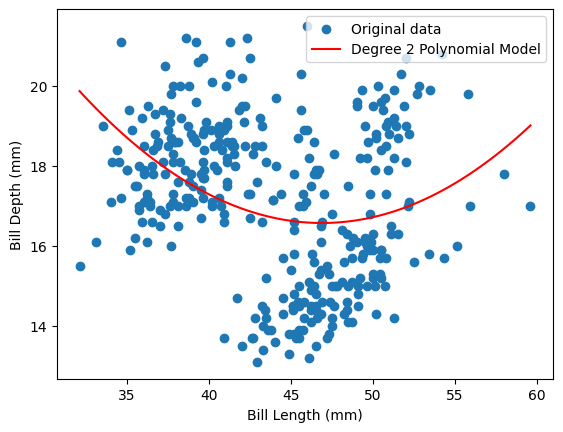

Root Mean Squared Error: 1.85


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


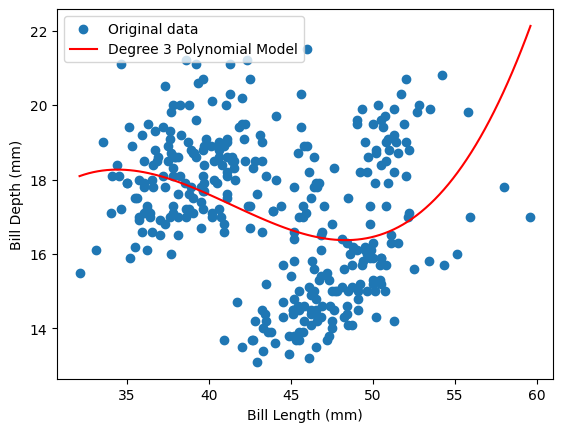

Root Mean Squared Error: 1.82


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


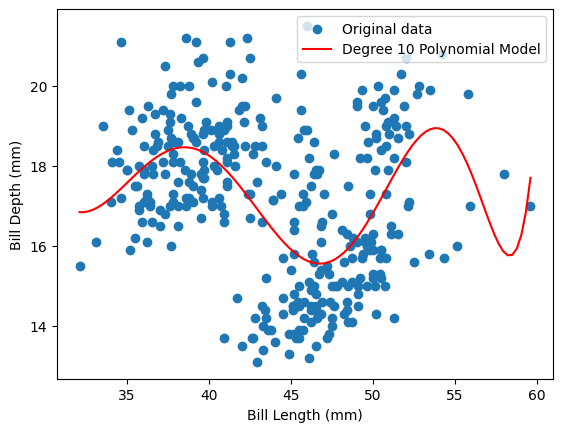

Root Mean Squared Error: 1.65


In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error

penguins = sns.load_dataset("penguins")
data = penguins[['bill_length_mm', 'bill_depth_mm']]

imputer = SimpleImputer(strategy='mean')
data_imputed = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

data_imputed = data_imputed.sample(frac=1, random_state=42).reset_index(drop=True)

X = data_imputed[['bill_length_mm']]
y = data_imputed['bill_depth_mm']

def train_and_plot_model(degree, X, y):
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X, y)


    X_pred = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
    y_pred = model.predict(X_pred)
    plt.scatter(X, y, label='Original data')
    plt.plot(X_pred, y_pred, label=f'Degree {degree} Polynomial Model', color='red')
    plt.xlabel('Bill Length (mm)')
    plt.ylabel('Bill Depth (mm)')
    plt.legend()
    plt.show()

    return model

def print_rmse(model, X, y):
    y_pred = model.predict(X)
    rmse = np.sqrt(mean_squared_error(y, y_pred))
    print(f'Root Mean Squared Error: {rmse:.2f}')

linear_model = train_and_plot_model(1, X, y)
print_rmse(linear_model, X, y)

quadratic_model = train_and_plot_model(2, X, y)
print_rmse(quadratic_model, X, y)

cubic_model = train_and_plot_model(3, X, y)
print_rmse(cubic_model, X, y)

degree_10_model = train_and_plot_model(10, X, y)
print_rmse(degree_10_model, X, y)


* Are any of the models above underfitting the data? If so, which ones and how can you tell?
* Are any of thhe models above overfitting the data? If so, which ones and how can you tell?
* Which of the above models do you think fits the data best and why?